<a href="https://www.kaggle.com/code/notabhishek97/heart-attack-predictor?scriptVersionId=163232523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

# 2. Loading the Datasheet

In [2]:
df=pd.read_csv("/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv")
df.shape

(8763, 26)

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# 3. Data Cleaning

In [4]:
#REMOVING ANY DUPLICATE OCCURENCE OF DATA

df = df.drop_duplicates()
df.shape

(8763, 26)

In [5]:
#CHECKING THE COLUMN INFO OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
#CHECKING THE COUNT OF NULL VALUES

missing_values = ["NA", "na", "N/A", " "]
df = pd.read_csv("/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv", na_values=missing_values)
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

# DATA ANALYSIS

# PLOTTING GRAPHS

In [7]:
#Graph for Age Distribution
fig14 = px.histogram(df, x='Age', nbins=20, marginal='rug', color_discrete_sequence=['skyblue'])

fig14.update_layout(
    title='Age Distribution',
    xaxis_title='Age',
    yaxis_title='Frequency'
)
fig14.update_traces(marker_line_color='white', marker_line_width=2)
fig14.update_layout(plot_bgcolor='white')

fig14.show()


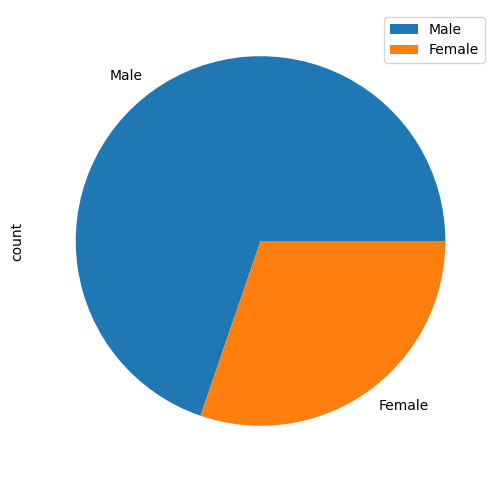

In [8]:
#Distribution of gender using matplot lib
platform = df['Sex'].value_counts()
platform.plot(kind='pie',figsize=(6,6))
plt.legend()
plt.show()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

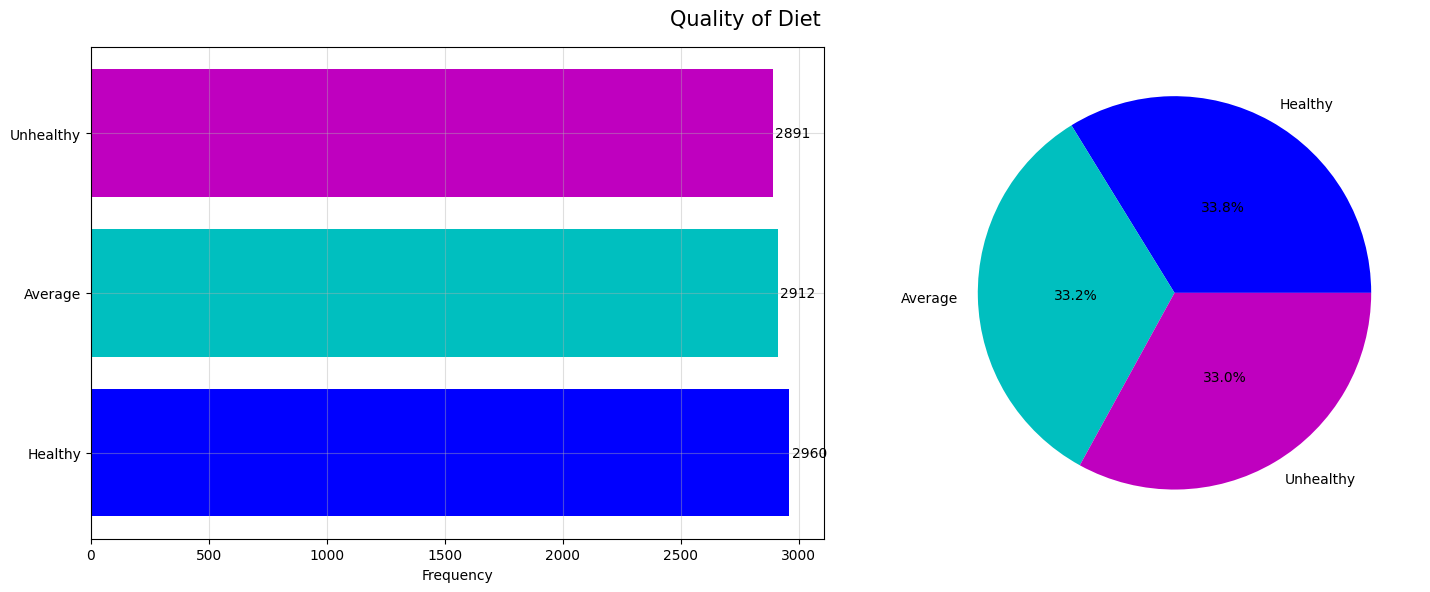

In [9]:
#Quality of Diet Bar Graph and Pie Chart

diet = df['Diet'].value_counts()
display(diet)

figure, axes = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'width_ratios':[1.2,1]})
axes[0].barh(y=diet.index, width=diet.values, color=['b','c','m','red','orange','g','lawngreen','mediumseagreen'])
axes[0].set_xlabel('Frequency')
axes[0].grid(alpha=0.4)

for index, values in enumerate(diet):
    axes[0].text(values+10, index, str(values), va='center')

axes[1].pie(diet.values, labels=diet.index, colors=['b','c','m','red','orange','g','lawngreen','mediumseagreen'], autopct='%1.1f%%', pctdistance=0.5)

figure.suptitle('Quality of Diet', fontsize=15)
plt.tight_layout()
plt.show()

In [10]:
#Geographic Distribution of Heart Attack Risking Hot Spots across the Globe

fig2 = px.choropleth(df, locations='Country', locationmode='country names', color='Heart Attack Risk', hover_name='Country',
                    projection='natural earth', title='Heart Attack Distribution Rate', 
                    color_continuous_scale = px.colors.sequential.Blues)
fig2.show()

In [11]:
#Activity Level of People Across Top 10 Countries using Plotly Express for Dashboard

filtered_df = df[df['Country'] != 'Continent']

top_countries = filtered_df.groupby('Country')['Exercise Hours Per Week'].sum().sort_values(ascending=False).head(10)

fig3 = px.bar(
    x=top_countries.index,
    y=top_countries.values,
    color=top_countries.values, 
    labels={'x': 'Country', 'y': 'Exercise Hours Per Week'},
    title='Activity Level of People Across Top 10 Countries',
)

fig3.update_layout(
    xaxis=dict(tickangle=45),
    xaxis_title='Country',
    yaxis_title='Exercise Hours Per Week',
    coloraxis_colorbar=dict(title='Exercise Hours Per Week'), 
    plot_bgcolor='white' 
)

fig3.show()

In [12]:
#Intercorrelation factors heatmap

df2=df.copy()
numeric_columns = df2.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()

fig_corr_matrix = px.imshow(corr_matrix,
                            x=numeric_columns.columns,
                            y=numeric_columns.columns,
                            color_continuous_scale='Viridis', 
                            title='Interactive Correlation Matrix')

fig_corr_matrix.update_layout(width=800, height=800)

fig_corr_matrix.show()

In [13]:
#Diet Distribution using plotlyexpress

df3=df.copy()
diet = df3['Diet'].value_counts().reset_index()
diet.columns = ['Diet', 'Frequency']

fig6 = px.bar(diet, 
             x='Frequency', 
             y='Diet', 
             orientation='h',
             title='Quality of Diet',
             color='Diet',
             color_discrete_sequence=['blue','cyan','magenta','red','orange','green','lawngreen','mediumseagreen'])

fig6.update_layout(showlegend=False, plot_bgcolor='white' )

for index, row in diet.iterrows():
    fig6.add_annotation(x=row['Frequency'] + 10, y=row['Diet'], 
                       text=str(row['Frequency']), 
                       showarrow=False, 
                       font=dict(size=10, color='black'))

fig_6_pie = px.pie(diet, 
                 names='Diet', 
                 values='Frequency',  
                 color='Diet',
                 color_discrete_sequence=['blue','cyan','magenta','red','orange','green','lawngreen','mediumseagreen'],
                 labels={'Diet': 'Frequency'},
                 hole=0.5)

fig_6_pie.update_traces(textposition='inside', textinfo='percent+label')

fig6.show()
fig_6_pie.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [14]:
#Comparison of heart attack risk based on age group for dashboard

def get_age_group(age_classification):    
    if 78 <= age_classification <= 95: return '78-95'
    elif 59 <= age_classification <= 77: return '59-77'
    elif 43 <= age_classification <= 58: return '43-58'
    elif 27 <= age_classification <= 42: return '27-42'
    elif 11 <= age_classification <= 26: return '11-26'
    else:
        return 'Invalid'
    
df['Age group'] = df['Age'].apply(get_age_group)

df['Age group'].value_counts().values.sum() == df.shape[0]

age_classification = df.groupby(by='Age group', as_index=False)['Heart Attack Risk'].value_counts()
fig7 = px.histogram(age_classification,
            x='Age group',
            y='count',
            color='Heart Attack Risk',
            text_auto=True,
            barmode='group')

fig7.update_traces(marker_line_color = 'black',
                  marker_line_width = 2)
fig7.update_layout(plot_bgcolor='white')

fig7.show()

#Chi square test of heart attack risk based on age group 

contingency_table = pd.crosstab(df['Age'], df['Heart Attack Risk'])


print("Contingency Table:")
print(contingency_table)


chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)


alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Is the result statistically significant?")
if p < alpha:
    print("Yes, we reject the null hypothesis.")
else:
    print("No, we fail to reject the null hypothesis.")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Contingency Table:
Heart Attack Risk   0   1
Age                      
18                 82  41
19                 88  40
20                 91  39
21                 76  41
22                 84  40
..                 ..  ..
86                 59  46
87                 72  54
88                 82  41
89                 74  43
90                 97  55

[73 rows x 2 columns]

Chi-Square Statistic: 64.75767234100789
P-value: 0.7153113598488454

Significance level (alpha): 0.05
Is the result statistically significant?
No, we fail to reject the null hypothesis.


In [15]:
#Comparison of heart attack risk based on income group for dashboard

def get_income_group(income):
    if income > 120000: return 'high income'
    elif 30000 <= income <= 120000: return 'middle income'
    else:
        return 'low income'

        
df2['income group'] = df2['Income'].apply(get_income_group) 
df2['income group'].value_counts().values.sum() == df2.shape[0]


income = df2.groupby(by='income group', as_index=False)['Heart Attack Risk'].value_counts()
fig9 = px.histogram(income,
            x='income group',
            y='count',
            color='Heart Attack Risk',
            text_auto=True,
            title='Heart attack risk data by income group',
            barmode='group')

fig9.update_traces(marker_line_color = 'black',
                  marker_line_width = 2)
fig9.update_layout(plot_bgcolor='white')

fig9.show()

#Chi square test of heart attack risk based on Income group 

contingency_table = pd.crosstab(df2['income group'], df2['Heart Attack Risk'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Is the result statistically significant?")
if p < alpha:
    print("Yes, we reject the null hypothesis.")
else:
    print("No, we fail to reject the null hypothesis.")



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Contingency Table:
Heart Attack Risk     0     1
income group                 
high income        3604  2001
low income          234   110
middle income      1786  1028

Chi-Square Statistic: 2.864986243810329
P-value: 0.2387130390409906

Significance level (alpha): 0.05
Is the result statistically significant?
No, we fail to reject the null hypothesis.


In [16]:
#Comparison of heart attack risk based on medication usage - for dashboard 

medication = df.groupby(by=['Medication Use', 'Heart Attack Risk']).size().reset_index(name='count')

fig10 = px.bar(medication,
               x='Medication Use',
               y='count',
               color='Heart Attack Risk',
               text='count',
               color_continuous_scale='BuPu',
               title='Heart attack risk by medication use',
               width=600,
               height=400)

fig10.update_traces(marker_line_color='black', marker_line_width=2)
fig10.update_layout(plot_bgcolor='white')

fig10.show()

#Chi square test of heart attack risk based on Mediaction Usage

contingency_table = pd.crosstab(df['Medication Use'], df['Heart Attack Risk'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Is the result statistically significant?")
if p < alpha:
    print("Yes, we reject the null hypothesis.")
else:
    print("No, we fail to reject the null hypothesis.")

Contingency Table:
Heart Attack Risk     0     1
Medication Use               
0                  2826  1570
1                  2798  1569

Chi-Square Statistic: 0.03492601858954436
P-value: 0.8517507680318144

Significance level (alpha): 0.05
Is the result statistically significant?
No, we fail to reject the null hypothesis.


In [17]:
# #Comparison of heart attack risk based on previous heart problems - for dashboard
heart_problems = df.groupby(by='Previous Heart Problems', as_index=False)['Heart Attack Risk'].value_counts()

fig11 = px.bar(heart_problems,
            x='Previous Heart Problems',
            y='count',
            color='Heart Attack Risk',
            text_auto=True,
            color_continuous_scale = 'BuPu',
            title='Heart attack risk by previous heart problems',
            width=600,
            height=400)

fig11.update_traces(marker_line_color = 'black',
                  marker_line_width = 2)
fig11.update_layout(plot_bgcolor='white')

fig11.show()

#Chi square test of heart attack risk based on Previous Heart Problems

contingency_table = pd.crosstab(df['Previous Heart Problems'], df['Heart Attack Risk'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Is the result statistically significant?")
if p < alpha:
    print("Yes, we reject the null hypothesis.")
else:
    print("No, we fail to reject the null hypothesis.")

Contingency Table:
Heart Attack Risk           0     1
Previous Heart Problems            
0                        2836  1582
1                        2788  1557

Chi-Square Statistic: 1.1076944849690804e-05
P-value: 0.9973444819580106

Significance level (alpha): 0.05
Is the result statistically significant?
No, we fail to reject the null hypothesis.


In [18]:
#Comparison of heart attack risk based on Diet - for dashboard

diet = df.groupby(by='Diet', as_index=False)['Heart Attack Risk'].value_counts()

fig12 = px.bar(diet,
            x='Diet',
            y='count',
            color='Heart Attack Risk',            
            text_auto=True,
            title='Heart attack risk by diet group',
            color_continuous_scale = 'BuPu',
            width=600,
            height=400)

fig12.update_traces(marker_line_color = 'black',
                  marker_line_width = 2)
fig12.update_layout(plot_bgcolor='white')
fig12.show()

#Chi square test of heart attack risk based on Quality of Diet

contingency_table = pd.crosstab(df['Diet'], df['Heart Attack Risk'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Is the result statistically significant?")
if p < alpha:
    print("Yes, we reject the null hypothesis.")
else:
    print("No, we fail to reject the null hypothesis.")

Contingency Table:
Heart Attack Risk     0     1
Diet                         
Average            1886  1026
Healthy            1881  1079
Unhealthy          1857  1034

Chi-Square Statistic: 0.9547424223231122
P-value: 0.6204121826155014

Significance level (alpha): 0.05
Is the result statistically significant?
No, we fail to reject the null hypothesis.


In [19]:
#Comparison of heart attack risk based on Triglyceride Levels - for dashboard
fig13 = px.histogram(df2,
                    x='Triglycerides',
                    color='Medication Use',
                    title='Heart attack risk data by income group',
                    barmode='group')

fig13.update_traces(marker_line_color='black', marker_line_width=2)
fig13.update_layout(plot_bgcolor='white')

fig13.show()


#Chi square test of heart attack risk based on Trigkyceride Levels
contingency_table = pd.crosstab(df2['Triglycerides'], df2['Medication Use'])
print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Is the result statistically significant?")
if p < alpha:
    print("Yes, we reject the null hypothesis.")
else:
    print("No, we fail to reject the null hypothesis.")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Contingency Table:
Medication Use   0   1
Triglycerides         
30               9   7
31               8   6
32               8   3
33               7   6
34               2   4
...             ..  ..
796              5   8
797             12   7
798              5   7
799             13  12
800              4   4

[771 rows x 2 columns]

Chi-Square Statistic: 717.8493846737499
P-value: 0.9103768674447753

Significance level (alpha): 0.05
Is the result statistically significant?
No, we fail to reject the null hypothesis.


In [20]:
#Comparison of heart attack risk based on Triglyceride Levels - for dashboard
fig13 = px.histogram(df2,
                    x='Cholesterol',
                    color='Medication Use',
                    title='Heart attack risk data by income group',
                    barmode='group')

fig13.update_traces(marker_line_color='black', marker_line_width=2)
fig13.update_layout(plot_bgcolor='white')

fig13.show()

#Chi square test of Triglycerides based on Cholesterol 

contingency_table = pd.crosstab(df2['Cholesterol'], df2['Medication Use'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("Is the result statistically significant?")
if p < alpha:
    print("Yes, we reject the null hypothesis.")
else:
    print("No, we fail to reject the null hypothesis.")


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Contingency Table:
Medication Use   0   1
Cholesterol           
120             14  18
121             22  11
122             12  19
123             14  17
124             13  21
...             ..  ..
396             14  18
397             11   8
398             12   8
399             17  17
400             15  19

[281 rows x 2 columns]

Chi-Square Statistic: 281.5649600847039
P-value: 0.46248611413565577

Significance level (alpha): 0.05
Is the result statistically significant?
No, we fail to reject the null hypothesis.


# MODEL - HEART ATTACK PREDICTOR

The highlighting factors(age group, cholestrol levels, triglyceride levels, any sort of medication usage, the diet quality, previous heart problems) from the datasheet alone are not enough to predict the outcome of a potential heart attack, the designed model combines all the potential risking factors, taking input from a patient, analyse them and come up with an overall outcome of exposed risk rate with a recommendation.

In [21]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


df_new = df.copy()

df_new = df_new[['Age', 'Sex', 'Cholesterol', 
         'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk']]

df2 = df_new.copy()
df3 = df_new.copy()

#Transforming the data set for Model Preparation

df3 = df2.select_dtypes(include=['object'])
le = LabelEncoder()
label_encoder = {}
for column in df3:
    label_encoder[column] = le
    df3[column] = label_encoder[column].fit_transform(df2[column])

X = df2[['Age', 'Cholesterol', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use',
        'BMI', 'Triglycerides',
       'Sleep Hours Per Day', 'Stress Level', 'Income']]

y = df2[['Heart Attack Risk']]

smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

X_train, X_test, y_train, y_test = train_test_split \
(X_scaled, y_resample, test_size=0.33, random_state=42)


y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
    
model = KNeighborsClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

def dicti_vals(dicti):
    x = list(dicti.values())
    x = np.array([x])
    return x

#Running Patient Analysis

def lifestyle_change(predicted_outcome, dictionary):
    change = []
    if predicted_outcome > 0:
        
        if 'BMI' in patient_details and patient_details['BMI'] < 18.5:
            change.append('You should gain some weight')
        elif 'BMI' in patient_details and patient_details['BMI'] > 25:
            change.append('You should lose some weight')
        if 'Triglycerides' in patient_details and patient_details['Triglycerides'] > 200:
            change.append('Please consult a doctor for triglyeride medications.')
        if 'Stress Level' in patient_details and patient_details['Stress Level'] == 1:
            change.append('Please seek advice from a pyschologist')
        if 'Cholesterol' in patient_details and patient_details['Cholesterol'] > 170:
            change.append('Please consult a doctor for Cholesterol medications.')
        if 'Exercise Hours Per Week' in patient_details and patient_details['Exercise Hours Per Week'] < 4:
            change.append('You should exercise more often')
        if 'Smoking' in patient_details and patient_details['Smoking'] == 1:
            change.append('You should quit smoking')
        if 'Alcohol Consumption' in patient_details and patient_details['Alcohol Consumption'] == 1:
            change.append('You should quit alcohol')
        if 'Heart Rate' in patient_details and patient_details['Heart Rate'] < 40:
            change.append('Your heart beat rate is low, please seek professional advice')
        print("Heart attack risk:", predicted_outcome)
        for i in change:
            print(f"{i},")
        print("Please change your lifestyle based on above results to reduce your risks of getting a potential heart attack.")
        
    if predicted_outcome > 75:
        print("Consult a doctor immediately!")
        print("Potential heart attack risk:", predicted_outcome)

#Taking input details of a New Patient for Suggestions
        
patient_details = {'Age': 21, 'Cholesterol': 400, 'Heart Rate': 80,
       'Diabetes': 0, 'Family History': 1, 'Smoking': 0, 'Obesity': 1,
       'Alcohol Consumption':1, 'Exercise Hours Per Week': 2.07,
       'Previous Heart Problems':1, 'Medication Use':1,
       'BMI': 28.17, 'Triglycerides': 240,
       'Sleep Hours Per Day' : 2, 'Stress Level' : 1, 'Income' : 40000}
dict1 = pd.DataFrame([patient_details])
x = dicti_vals(patient_details)

predicted_outcome = model.predict_proba(x)[:, 1]
result = lifestyle_change(predicted_outcome, patient_details)
result

Heart attack risk: [0.6]
You should lose some weight,
Please consult a doctor for triglyeride medications.,
Please seek advice from a pyschologist,
Please consult a doctor for Cholesterol medications.,
You should exercise more often,
You should quit alcohol,
Please change your lifestyle based on above results to reduce your risks of getting a potential heart attack.
